In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (8, 6) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
%matplotlib inline
from wavenet import wavenetSC
                

In [2]:
wnsc = wavenetSC(num_inputs=256, num_outputs=1, num_units=1600, batch_size=256, lmda=.20, 
            lr_r=0.025, lr_W1=0.06, r1=3, r2=5, wi=5, we=30, sigmaE=3, target_sparsity=0.05)


In [3]:
with open('%s_W1.npy' % 'fig2_normalized', 'rb') as f:
    wnsc.W1 = np.load(f)

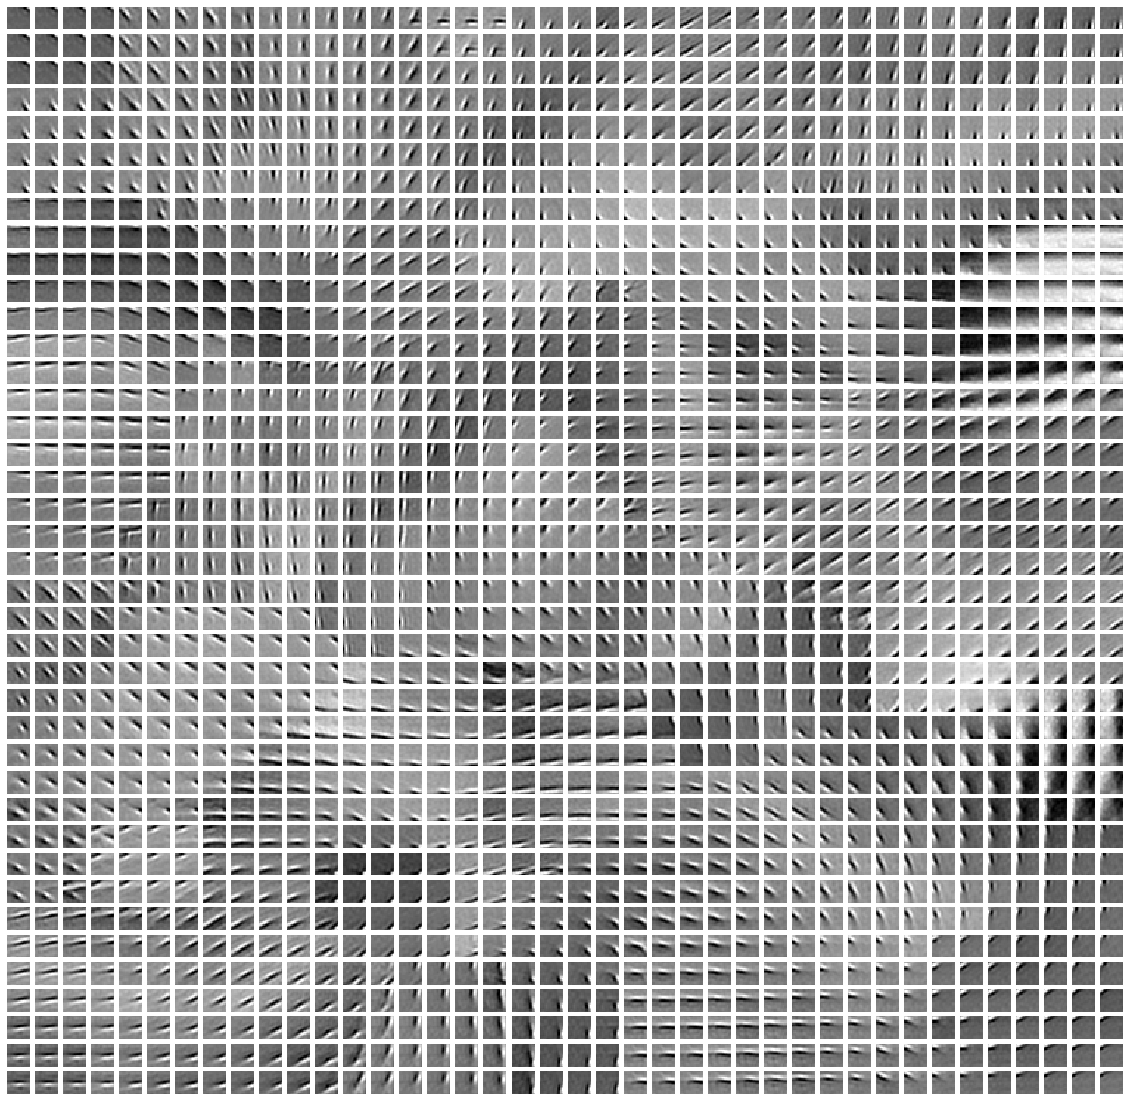

In [4]:
fig, ax = plt.subplots(40, 40, figsize=(20,20))
codewords = wnsc.W1.reshape((wnsc.W1.shape[0], 40, 40))
for i in np.arange(40):
    for j in np.arange(40):
        ax[i,j].imshow(codewords[:,i,j].reshape(16,16), cmap='binary')
        ax[i,j].axis('off')


In [5]:
fig.savefig('fig2_feedforward_weights.pdf', bbox_inches='tight')
fig.savefig('fig2_feedforward_weights.jpg', bbox_inches='tight')

In [6]:
batch = np.eye(256)
batch = batch - np.mean(batch, axis=1)
batch = batch / np.std(batch, axis=1)

In [7]:
wnsc.lmda = wnsc.cwsc.lmda = 0.025
activation, s = wnsc.compute_activations(batch)
activation = activation.reshape(batch.shape[0], 40, 40)
print('steps=%d' % s)

steps=13


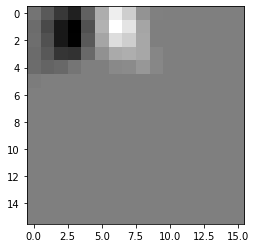

In [8]:
plt.imshow(activation[:,20,20].reshape(16,16), cmap='binary')

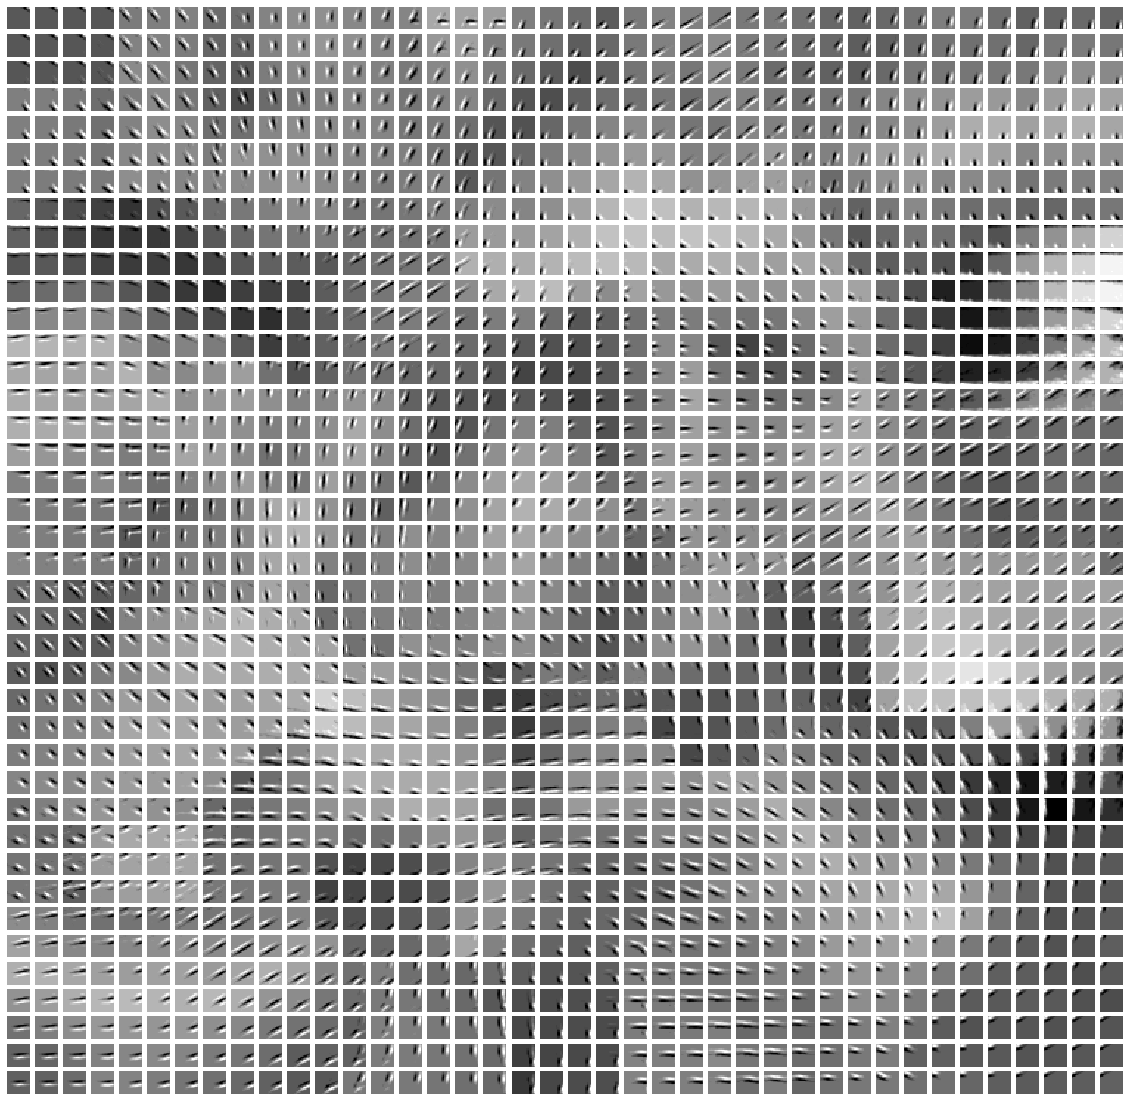

In [9]:
fig, ax = plt.subplots(40, 40, figsize=(20,20))
for i in np.arange(40):
    for j in np.arange(40):
        ax[i,j].imshow(activation[:,i,j].reshape(16,16), cmap='binary')
        ax[i,j].axis('off')

In [10]:
fig.savefig('fig2_receptive_fields.pdf', bbox_inches='tight')
fig.savefig('fig2_receptive_fields.jpg', bbox_inches='tight')